In [21]:
library(repr) ; options(repr.plot.res = 100, repr.plot.width=4, repr.plot.height= 4) # Change plot sizes (in cm) - this bit of code is only relevant if you are using a jupyter notebook - ignore otherwise

# Experimental design and Data exploration

Introduction 
------------

In this chapter you will learn how to use R to explore your data and determine appropriate statistical analyses. 

Ideally, you would like to design experiments (manipulations and/or observations) that are appropriate for the question you want to answer. However, you still need to explore you data to determine what kind of statistical analyses are appropriate for your data, because: 

(a) Your experiments or observations may not go as planned (do they ever?), and 

(b) You might have somebody else's data to analyse (very common in this era of "Big Data"). 

By the time you have worked through this chapter, you should be able to:

* Provided sufficient information is available, be able to judge whether the sampling design used to generate a particular dataset was appropriate

* Calculate basic statistical measures on your data to determine its properties.

* Determine if your sample sizes are adequate, especially for a specific statistical test.

We are going to start off with the simplest of scenarios for statistical testing — that you want to determine whether a sample, or a pair of samples meet some expectation (hypothesis) or not.

First, some let's revisit some key concepts and terminology. 

## Some statistical parlance

The following terms are important for you to get familiar with:

* **(Statistical) Population**: A *complete set* of items that share at least one *attribute* of interest. This attribute of interest is the target of your statistical analysis. For example, if we are interested in studying the weight of year-old cod in the Oceans, the population consists of *all* year-old cod, but more specifically, the weight measurements of all the individuals of the cod population is what we want to analyse.

---
:::{figure} cod-harvesting
<img src="./graphics/Cod.jpg" alt="ANOVA example" width="400px">

**Collapse of Atlantic cod stocks off the East Coast of Newfoundland in 1992.** <br>(Source: [Wikipedia](https://en.wikipedia.org/wiki/Collapse_of_the_Atlantic_northwest_cod_fishery))
:::

---


* **(Statistical) Distribution**: A mathematical description (expressed as a mathematical equation) of the properties of a population of interest. Theoreticians have come up with a bunch of distributions (e.g., Gaussian or Normal, Poisson, Binomial, etc.) that are appropriate for different kinds of data. Figuring out which distribution best describes a population of interest is one of the first steps in a statistical analysis. The primary goal of experimental design is to collect and measure sufficient individuals of a population to adequately characterize the statistical properties of an attribute (e.g., body weight of yearling cod) of interest. That is, the *statistical distribution* that best characterizes the attribute. 


* **(Data or Population) Sample**: A data *sample* is a set of measurements of the attribute of interest collected from a  (statistical) *population* (all the individuals of interest) by a defined procedure (*sampling methodology*). In the cod example above, this could be the weight of every individual of a *subset* (the *sample*) of the year-old cod population. This could be from a particular location, such as the Atlantic ocean.


* **(Statistical) Parameter** :   A measure of some attribute of the (theoretical) *statistical distribution* that is supposed to represent your population. An example would be the average weight of *all* yearling cod, which presumably follow some sort of distribution. In practice, this is not measurable because the population is much too large or incompletely inaccessible/invisible — imagine measuring the weight of every year-old cod individual in the Atlantic ocean!


* **Statistic**(singular):  An *estimate* of a statistical parameter of the population of interest, obtained by calculating the measure for a *sample*. An example would be the average or mean weight of individuals in a sample of one-year old cod in the Atlantic Ocean. This is also known as a *descriptive statistic*. Therefore, a *Statistic* is to a *Statistical Parameter* what a  *Sample* is to the (Statistical) *Population*. For example, the average of a sample of cod weights is a statistic that  *estimates* the "real" average of the weights of the entire one-year Cod population (which is its statistical parameter). This real average is also the mean value of the theoretical distribution (e.g., Gaussian) that the population is expected to follow. 


* **Hypothesis**: An informed  *postulate* about an attribute of your population of interest. For example, you may hypothesize that the one-year old cod population's mean weight has declined over the last two decades because of preferential fishing of larger individuals. You will typically confront your main hypothesis with a *Null Hypothesis*, to minimize the risk of making a significant *Type I error*. This is the probability of wrongly accepting an *alternative (or main) hypothesis* even is not really true, and rejecting the null hypothesis (e.g., the yearling cods have in reality not declined in weight, but you wrongly infer that they have). This is a big NO NO from a scientific and philosophical standpoint. The rate or probability of the Type I error is denoted by the Greek letter $\alpha$, and equals the *significance level* of a statistical test. Wrongly rejecting a true alternative (main) hypothesis is also  a *Type II* error

(12-ExpDesign-descriptive-stats)=

## Descriptive Statistics

The key statistical measures that describe a sample (or a population) are:

* [**Mean**  (or average, or more precisely, the arithmetic mean)](https://en.wikipedia.org/wiki/Arithmetic_mean):  This is a measure of the [*central tendency*](https://en.wikipedia.org/wiki/Central_tendency) of the sample and population (what values most of the data tend to have). Given a sample $x_1,x_2,\ldots,x_n$ of size $n$, the mean is typically denoted by a $\bar{x}$:

$$\bar{x} =  \frac{x_{1} + x_{2} + \dots +x_{n}}{n} = \bar{x} = \frac{\sum_{i=1}^n x_i}{n}$$

That is, it is the sum of all the values in a sample divided by the number, $n$, of items in the sample.

* [**Standard deviation**](https://en.wikipedia.org/wiki/Standard_deviation): A measure of spread of the population around the mean. This is typically denoted by $s$,and is calculated as:

$$s = \sqrt{\frac{(\bar{x} - x_{1})^{2} + (\bar{x} - x_{2})^2 + \dots + (\bar{x} - x_{n})^{2}}{n-1}} =  \sqrt{\frac{\sum_{i=1}^n (\bar{x} - x_{i})^2}{n-1}}$$

That is, it is the square root of the sum of squares ("SS") of the differences between each item in the sample and the mean, divided by the *degrees of freedom, "df"* remaining in the data set ($n-1$). df is the sample size, $n$, minus the number of statistical parameters estimated from the data set. This is to reduce the  *bias* in your *estimate* of the statistic, as you are calculating it from the sample, and not the whole theoretical population. 

Thus, the formula for $s$ above has $n-1$ in its denominator because, to work out the standard deviation, you must have already estimated the mean ($\bar{x}$) from the same data set. This removes 1 degree of freedom. Also, note that the sample variance, $s^2$ is the square of standard deviation. Or, in other words, the standard deviation is the square-root of the variance!

* [**Median**](https://en.wikipedia.org/wiki/Median): The above two statistics (mean and sd) are particularly meaningful when the sample and population have a symmetric distribution (e.g., normal or gaussian). When the distribution is not symmetric (that is, it is [*skewed*](https://en.wikipedia.org/wiki/Skewness)), the *median*  is a better measure of central tendency. This is the middle value in the ordered set of data. That is, exactly 50% of the data lie below and 50% lie above the median.

* Other descriptive statistics you should keep in mind is the [range](https://en.wikipedia.org/wiki/Range_(statistics)) (difference between the largest and smallest values), and the [quartiles](https://en.wikipedia.org/wiki/Quartile) (values lying in the data divided into the intervals $[{1\over4}, {1\over 2},{3\over 4}, 1]$ or at 1% intervals (percentiles). Box-plots, which you have seen, represent a number of these statistics in one figure, as you will soon learn in practice below.

## Descriptive statistics in R

Here are the R commands for the key descriptive statistics:   

|Command | Functionality|
|:- |:-|
| `mean(x)`| Compute mean (of a vector or matrix)|
| `sd(x)` |              Standard deviation|
| `var(x)` |             Variance|
| `median(x)` |          Median|
|  `quantile(x,0.05)` |   Compute the 0.05 quantile|
|  `range(x)`|           Range of the data|
| ` min(x)`|             Minimum|
|  `max(x)`|             Maximum|
|  `sum(x)`|             Sum all elements|

(12-ExpDesign:Data-types-and-distributions)=
## Data types and (statistical) distributions

You will typically encounter or sample the following main types of data:

* **Continuous numeric**: Data that can take decimal values (real numbers) such as human height or weight. These may be unbounded (any value between negative infinity to positive infinity), or bounded (e.g., between or zero and some upper positive number) like human weight. This is the `numeric` or `real` data type in R. 

* **Discrete numeric**: Integer (whole) numbers such as counts of individuals in a population, e.g., The number of bacteria in a ml of pond water. This is the `int` data type in R.

* **Percentage (proportion)**: A particular kind of numeric data that is strictly bounded between 0 and 100. The fact that you can never get samples of percentages that exceed these bounds makes such data tricky to analyse. This also falls under the `numeric` or `real` data type in R. 

* **Categorical**: Consisting of a fixed number of discrete categories. These are typically stored as a *factor* in R, with the categories stored as *levels* in character (string) data type format. For example, the factor "Type.of.feeding.interaction" from the predator-prey dataset you have [used previously](08-Data_R.ipynb#Basic-plotting-commands) had five levels: "insectivorous", "piscivorous", "planktivorous", "predacious", and "predacious/piscivorous".

* **Binary (presence/absence)**: A special type of categorical data are binary, where only two categories/states/values are possible: (1, 0) (or "present", "absent") (e.g., a disease symptom). These may be stored as integer, character, or boolean (`TRUE`/`FALSE`) in R.

While designing experiments or exploring data, you need to keep in mind that each data type will often be best-represented by a particular *statistical distribution*. For example, continuous numeric data are *often* normally distributed. On the other hand, count data are likely to be distributed according to the Poisson distribution.

If you are lucky, you will mostly have to deal with data that are continuous or discrete numeric, which are the most straightforward to analyse using Linear models (more on that in subsequent chapters). However, some of the most interesting and important problems in biology involve proportion (percentage), categorical and binary data (e.g., Presence or absence of a disease symptom).

For example, think about what type of data, and what type of distribution, a sample of the following is likely to be:

* Wavelength of light
* Temperature
* Egg clutch size
* Rate of a reaction
* Eye-colour
* Score in Scrabble
* Undregraduate Degree class
* Ground-cover of grass in a quadrat
* Winning side in chess


(12-ExpDesign:Sampling-from-distributions-in-R)=
## Sampling from distributions in R

You can generate samples form many statistical distributions in R. This is a handy thing to know because this allows you to simulate a sampling "experiment" . In particular, the following R commands are important:

|Command | Functionality|
|:- |:- |
|`rnorm(n, m=0, sd=1)`|      Draw `n` [normally-distributed](https://en.wikipedia.org/wiki/Normal_distribution) random numbers with mean = 0 and sd = 1|
|`dnorm(x, m=0, sd=1)`|       Density function of the normal distribution, which can be used to calculate the probability of a particular event or a set of independent events|
| `qnorm(x, m=0, sd=1)`|      Cumulative density function|
|`runif(n, min=0, max=2)`|   Twenty random numbers from uniform distribution with bounds $[0, 2]$|
|`rpois(n, lambda=10)`|      Twenty random numbers from the Poisson($\lambda$) distribution|

Let's try some of these. Generate a random sample of 10:

In [22]:
MySample <- rnorm(10, m=0, sd=1)

In [23]:
MySample

[1] -0.4773895  1.0811861 -1.1410569  0.1617367  0.7025651 -0.9523129
 [7] -1.2382048 -0.8605048  0.2833527  0.7342878

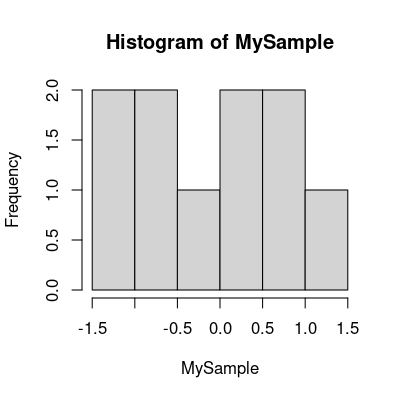

In [24]:
hist(MySample)

Probability of getting a value of 1 or -1 from a normally distributed random number with mean = 0 and sd = 1: 

In [25]:
dnorm(1, m=0, sd=1)

[1] 0.2419707

In [26]:
dnorm(-1, m=0, sd=1)

[1] 0.2419707

Probability of getting large values given the same distribution:

In [27]:
dnorm(10, m=0, sd=1)

[1] 7.694599e-23

Very small!

In [28]:
dnorm(100, m=0, sd=1)

[1] 0

Zero!

Look up the documentation and examples for the other commands/functions listed above and many others that are available. 

## Two basic rules of experimental design and sampling

In general, while designing experiments, and sampling from a  *population*, there are two key (and simple) rules:

1.  **The more you sample, the more your sample's distribution will look like the population distribution** (obviously!)

2.  **The more you sample, the closer will your sample statistic be to the population's statistical parameter** (the central limit theorem; when the statistical parameter is the mean, this is the "law of large numbers")

Let's test rule 1 using R. We will perform a "experiment" by generating random samples of increasing size from the normal distribution: 

In [29]:
MySample5 <- rnorm(5, m=0, sd=1) # Draw 5 normal random nos w/ mean 0 and s.d. 1:
MySample10 <- rnorm(10, m=0, sd=1) 
MySample20 <- rnorm(20, m=0, sd=1) 
MySample40 <- rnorm(40, m=0, sd=1)
MySample80 <- rnorm(80, m=0, sd=1)
MySample160 <- rnorm(160, m=0, sd=1)

Now let's visualize these "samples":

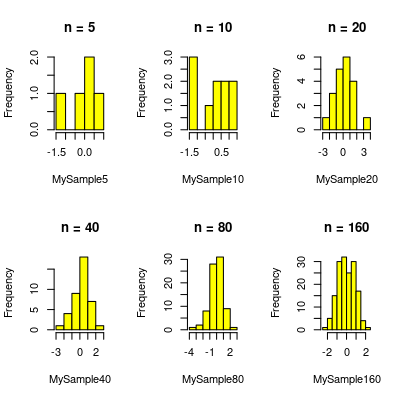

In [30]:
par(mfcol = c(2,3)) #initialize multi-paneled plot
par(mfg = c(1,1)); hist(MySample5, col = rgb(1,1,0), main = 'n = 5') 
par(mfg = c(1,2)); hist(MySample10, col = rgb(1,1,0), main = 'n = 10') 
par(mfg = c(1,3)); hist(MySample20, col = rgb(1,1,0), main = 'n = 20') 
par(mfg = c(2,1)); hist(MySample40, col = rgb(1,1,0), main = 'n = 40') 
par(mfg = c(2,2)); hist(MySample80, col = rgb(1,1,0), main = 'n = 80') 
par(mfg = c(2,3)); hist(MySample160, col = rgb(1,1,0), main = 'n = 160') 

Rule 2 above states that if I was to repeat even $n = 5$ sufficient number of times, you would get a good *estimate* of mean (= 0) and standard deviation (= 1) of the normal distribution we sampled from. Try doing it. You can take increasing numbers of samples of 5, take their mean, and check how close to get to 0 as you increase your number of samples of 5.  

If you give due regard to the two rules of experimental design above, and consider the type of distribution your population of interest follows, you will have taken some basic, important steps towards designing an effective study. 

A more rigorous method for designing experiments is to perform a [power analysis](https://en.wikipedia.org/wiki/Power_(statistics)). Power analyses allow you to estimate the minimum sample size required to be able to detect (while minimizing Type I error) an effect of a given size. Covering this is outside the scope of the current course, but you might want to have a look at [this resource](https://www.statmethods.net/stats/power.html).

OK, so you have performed your experiments or field sampling, or some data have fallen into your lap. Let's move on to data exploration.

## Data exploration

### Some general tips

Statistics is a bit of an art.

That is why *a priori* visualization is important, and directly cutting to the (statistical) chase can often leave one floundering with confusing coefficient estimates and model fits (or over-fits) and overall uncertainty about whether you have picked the right statistical test. 

* So no matter what, always first look at the distribution of the response (the "raw data"). If you see multi-modality (multiple peaks), it might mean that some process or effect is generating it. So, in the dragonfly-damselfly example below, a preliminary visualization of the densities of genome size immediately tell you that there are actually two populations (e.g., two levels of  effects, or a process that generates the two populations with different central tendencies $\mu_A$ and $\mu_B$). 

* If it is a regression-type problem, look at the marginal distributions (distributions of the x and y variables) - similar insights can be gained.

* Also, one can look at the distributions within the effects to look for consistency of both shape (sample of the underlying population's distribution type) and spread (sample of the underlying population's variance). 
    * If there is consistency in both, the battle is pretty much won, because normal or not, there are statistical methods (GLMs, for example) that can be used. 
    * If there is consistency in distribution type but not in variance, half the battle is won. Unequal variances very often tend to be a problem with unbalanced sampling (across effects/treatments), so you can throw in mixed effects (so, GLMMs) which allows you to use empirical information (the data) across effects to help correct for it. 
    * And also, very often, tests are robust to unequal variances (you would need to find a statistical paper, or do your own simulations to support this - so very often better to stick with mixed effects). 
    * If there is consistency in variance but not shape, or inconsistency in both, then you have a harder problem, and may have to resort to transforming some data and not others (not ideal, to be avoided).

### A case study

As a case study, we will use data from a paper looking at the relationship between genome size and body size across species of dragonflies and damselflies ([Odonata](http://en.wikipedia.org/wiki/Odonata)):

> Ardila-Garcia, AM & Gregory, TR (2009) 'An exploration of genome size diversity in dragonflies and damselflies (Insecta: Odonata)' Journal of Zoology, 278, 163 - 173

You will work with the script file `ExpDesign.R`, which performs exploratory analyses on the data in `GenomeSize.csv`. Let's go through the code block by block.

$\star$ Get the script `ExpDesign.R` from the TheMulQuaBio repository and put it in your own `Code` directory.

$\star$ Also get `GenomeSize.csv`

$\star$ Open the script `ExpDesign.R` in RStudio (or some other text editor).

Use the shift and arrow keys to select the code in block (2), including the comments. Now use the keyboard short cut (look back at the R Chapters if you don't know how!) to run the highlighted block of code.

In [76]:
genome <- read.csv('../data/GenomeSize.csv', stringsAsFactors = T)

Note the relative path `../`, which will work assuming that you are working from your `code` directory (that is, you have set your working directory (using `setwd()`) to `code`). Also note the `stringsAsFactors = T` flag, which [is necessary in any R version > 4.0.0](https://developer.r-project.org/Blog/public/2020/02/16/stringsasfactors/).

This first line (block (1)) reads in the data, as you have learned previously.

$\star$ Now run the code in block (2) line by line.

In [84]:
head(genome) # this won't look so nice on your computer!

,Suborder,Family,Species,GenomeSize,GenomeSE,GenomeN,BodyWeight,TotalLength,HeadLength,ThoraxLength,AdbdomenLength,ForewingLength,HindwingLength,ForewingArea,HindwingArea,MorphologyN
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Anisoptera,Aeshnidae,Aeshna canadensis,2.20,NA,1,0.159,67.58,6.83,11.81,48.94,45.47,45.40,369.57,483.61,2
2,Anisoptera,Aeshnidae,Aeshna constricta,1.76,0.06,4,0.228,71.97,6.84,10.72,54.41,46.00,45.48,411.15,517.38,3
3,Anisoptera,Aeshnidae,Aeshna eremita,1.85,NA,1,0.312,78.80,6.27,16.19,56.33,51.24,49.47,460.72,574.33,1
4,Anisoptera,Aeshnidae,Aeshna tuberculifera,1.78,0.10,2,0.218,72.44,6.62,12.53,53.29,49.84,48.82,468.74,591.42,2
5,Anisoptera,Aeshnidae,Aeshna umbrosa,2.00,NA,1,0.207,73.05,4.92,11.11,57.03,46.51,45.97,382.48,481.44,1
6,Anisoptera,Aeshnidae,Aeshna verticalis,1.59,NA,1,0.220,66.25,6.48,11.64,48.13,45.91,44.91,400.40,486.97,1


In [85]:
str(genome) # Check what the data columns contain

'data.frame':	100 obs. of  16 variables:
 $ Suborder      : Factor w/ 2 levels "Anisoptera","Zygoptera": 1 1 1 1 1 1 1 1 1 1 ...
 $ Family        : Factor w/ 9 levels "Aeshnidae","Calopterygidae",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Species       : Factor w/ 100 levels "Aeshna canadensis",..: 1 2 3 4 5 6 8 17 46 53 ...
 $ GenomeSize    : num  2.2 1.76 1.85 1.78 2 1.59 1.44 1.16 1.44 1.2 ...
 $ GenomeSE      : num  NA 0.06 NA 0.1 NA NA NA NA NA NA ...
 $ GenomeN       : int  1 4 1 2 1 1 1 1 1 1 ...
 $ BodyWeight    : num  0.159 0.228 0.312 0.218 0.207 0.22 0.344 0.128 0.392 0.029 ...
 $ TotalLength   : num  67.6 72 78.8 72.4 73 ...
 $ HeadLength    : num  6.83 6.84 6.27 6.62 4.92 6.48 7.53 5.74 8.05 5.28 ...
 $ ThoraxLength  : num  11.8 10.7 16.2 12.5 11.1 ...
 $ AdbdomenLength: num  48.9 54.4 56.3 53.3 57 ...
 $ ForewingLength: num  45.5 46 51.2 49.8 46.5 ...
 $ HindwingLength: num  45.4 45.5 49.5 48.8 46 ...
 $ ForewingArea  : num  370 411 461 469 382 ...
 $ HindwingArea  : num  484 517 574

Have a good look at the data. There are three factors (categorical variables): Suborder, splitting the species into dragonflies (Anisoptera) and damselflies (Zygoptera); Family, splitting the species further into 9 taxonomic families; and Species, giving the latin
binomial for each species in the table. The remaining columns are measurements of genome size (in picograms) and measurements of body size and morphology (in grams, mm and mm$^2$). There are two columns ending with an N that show the sample size from which the observations for each species are taken and a column ending SE showing standard errors.

One thing you should see in the output from `head` or `str` is that there are some observations marked as `NA` – this is the way R shows *missing data*. It is important to check how much missing data there are in a dataset, so we'll use another function that includes this information. Many R functions refuse to use variables containing missing data — this is just R being careful and you can add `na.rm=TRUE` into most functions to avoid this problem.

$\star$ Run the `summary` line from the script window (block 3).

In [86]:
summary(genome)

       Suborder             Family                   Species     GenomeSize    
 Anisoptera:62   Coenagrionidae:27   Aeshna canadensis   : 1   Min.   :0.4100  
 Zygoptera :38   Libellulidae  :25   Aeshna constricta   : 1   1st Qu.:0.7375  
                 Gomphidae     :14   Aeshna eremita      : 1   Median :0.9400  
                 Aeshnidae     :11   Aeshna tuberculifera: 1   Mean   :1.0143  
                 Corduliidae   : 9   Aeshna umbrosa      : 1   3rd Qu.:1.1800  
                 Lestidae      : 7   Aeshna verticalis   : 1   Max.   :2.3600  
                 (Other)       : 7   (Other)             :94                   
    GenomeSE          GenomeN        BodyWeight       TotalLength   
 Min.   :0.00600   Min.   : 1.00   Min.   :0.00200   Min.   :22.82  
 1st Qu.:0.02000   1st Qu.: 1.00   1st Qu.:0.01200   1st Qu.:32.35  
 Median :0.03000   Median : 1.00   Median :0.04000   Median :41.41  
 Mean   :0.03398   Mean   : 2.36   Mean   :0.07486   Mean   :43.76  
 3rd Qu.:0.0400

Note that each column gets a separate summary! Look carefully at the output. There is a column for each variable: for factors, it provides a short table of the number of observations in each level and for continuous variables, it provides some simple summary statistics about the distribution (range, quartiles, mean and median), and the number of missing values.

## Visualise distributions of the variables

The `summary` function shows us the basic distribution (range, quartiles, mean and median) of a continuous variable, but this is easier to interpret if we visualise it. We'll look at two ways:

* **Histogram**: In the simplest form, this shows the number of observations of the variable falling into a set of bins spanning the range of the variable. The option `breaks` allows you to change the number of bins.

* **Density plot**:   Rather than showing blocks of counts, the density plot shows a continuous smooth line. This is a *smoothed* estimate of the how frequently data is observed across the range of values and the *bandwidth* (`bw=0.1`) controls the degree of the smoothing.

$\star$ Go to block (4) of the script and run each line separately, looking at the output.


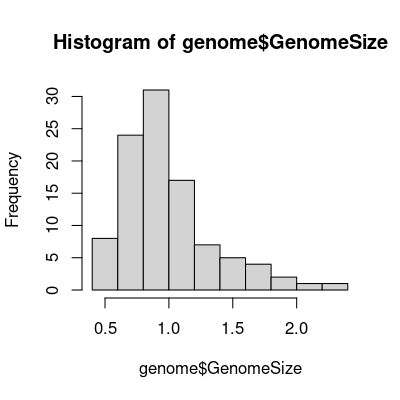

In [87]:
hist(genome$GenomeSize, breaks=10)

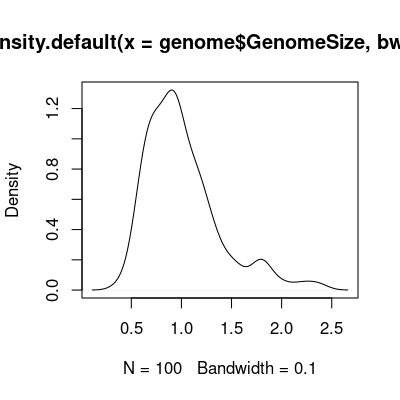

In [88]:
plot(density(genome$GenomeSize, bw=0.1))

In your code editor, change the values of `breaks` and `bw` (for example `breaks=5` and `bw=0.05`), and re-run these lines to see how this affects the graph. Basically, with both types of graph you can look at the data too coarsely or too finely.

The graphs you've just created look at genome size. Add a copy of those two lines of code in the script and change them to look at the variable `TotalLength`. You will need to alter the `density` function to ignore missing values (`na.rm=TRUE`) and to play around with the bandwidth. You should get something like this:

---

<img src="./graphics/histTL1.png" width="300px">

<img src="./graphics/histTL2.png" width="300px">

---

## Take a quick look at effects of certain factors

R has a special way of describing a model that defines the response variable and the explanatory variables ("factors"). This is called a 'formula' and is used to define linear models (more on these in a later chapters). The same structure is used in many plotting functions and will put the response variable on the $y$ axis and the explanatory variable on the $x$ axis. The structure is "response variable ~ explanatory variables". We will look at multiple explanatory variables in a later chapter but an example with one explantory variable (factor) is:

`Genome Size ~ Suborder`

This formula tells R to model genome size 'as a function of' (`~`) the suborders of Odonata. When using this syntax in a `boxplot` function, the result will be to plot genome size as a function of the suborders.

## Compare distribution of the variable across levels of a factor

Although looking at the distribution of variables is a good first step, we often want to compare distributions. In this case, we might want to know how genome size varies between dragonflies and damselflies. The first way we will look at is using boxplots — these show the median and the 25% and 75% quantiles as a box, with whiskers extending to the minimum and maximum. More extreme outliers are plotted independently as points. The `plot` function in R automatically generates a boxplot when the explanatory variable is a factor (i.e., provided you have the necessary grouping columns deignated to be the `factor` class; review the variable types and data structures sections of [the R Chapter](07-R.ipynb) if this sounds like greek to you).

$\star$ Go to block 5 of the script and run the first line, looking at genome size between the two suborders:

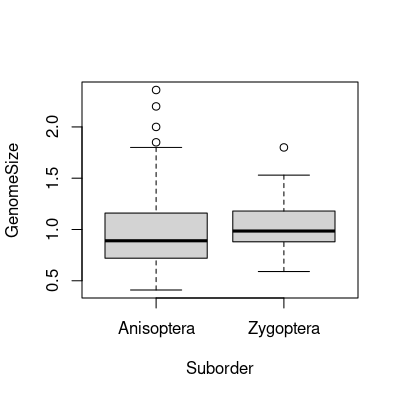

In [89]:
plot(GenomeSize ~ Suborder, data=genome)

Duplicate and alter this line to look at the same plot for total length. You should get a plot like this:

---

<img src="./graphics/bxpTL.png" width="300px">
 

---

Although histograms are great for one variable, plotting two histograms on top of one another rarely works well because the overlapping bars are hard to interpret (recall the predator-prey body size example). Density plots don't have this problem, but it takes a bit more code to create the plot.

$\star$ Block 6 of the script uses the `subset` function to create two new data frames separating the data for dragonflies and damselflies. Run the first two lines of this block: 

In [90]:
Anisoptera <- subset(genome, Suborder=='Anisoptera') #The dragonflies
Zygoptera <- subset(genome, Suborder=='Zygoptera') #The damselflies

Remember that the arrow symbol (`<-`) is used to save the output of a function into a new
object in R — if you use `ls()` in the console, you will see the two new data frames.

In the console, use `str` and `summary` to explore these two new dataframes. For example:

In [91]:
head(Anisoptera)

,Suborder,Family,Species,GenomeSize,GenomeSE,GenomeN,BodyWeight,TotalLength,HeadLength,ThoraxLength,AdbdomenLength,ForewingLength,HindwingLength,ForewingArea,HindwingArea,MorphologyN
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Anisoptera,Aeshnidae,Aeshna canadensis,2.20,NA,1,0.159,67.58,6.83,11.81,48.94,45.47,45.40,369.57,483.61,2
2,Anisoptera,Aeshnidae,Aeshna constricta,1.76,0.06,4,0.228,71.97,6.84,10.72,54.41,46.00,45.48,411.15,517.38,3
3,Anisoptera,Aeshnidae,Aeshna eremita,1.85,NA,1,0.312,78.80,6.27,16.19,56.33,51.24,49.47,460.72,574.33,1
4,Anisoptera,Aeshnidae,Aeshna tuberculifera,1.78,0.10,2,0.218,72.44,6.62,12.53,53.29,49.84,48.82,468.74,591.42,2
5,Anisoptera,Aeshnidae,Aeshna umbrosa,2.00,NA,1,0.207,73.05,4.92,11.11,57.03,46.51,45.97,382.48,481.44,1
6,Anisoptera,Aeshnidae,Aeshna verticalis,1.59,NA,1,0.220,66.25,6.48,11.64,48.13,45.91,44.91,400.40,486.97,1


Now that we've got the data separated we can go about plotting the two curves.

$\star$ Run the next two lines of code in block 6. The first draws the plot for damselflies and the second adds a line for the dragonflies:

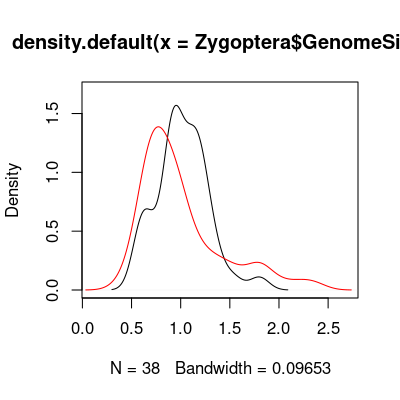

In [92]:
plot(density(Zygoptera$GenomeSize), xlim=c(0.1, 2.7), ylim=c(0,1.7))
lines(density(Anisoptera$GenomeSize), col='red')

Duplicate these last two lines of code and edit them to generate a similar plot for total body length. You will need to edit the code to change the range of the $x$ and $y$ axes (`xlim` and `ylim`) to get both curves to fit neatly on to the graph. It should look like this:

---
<img src="./graphics/densTL.png" width="300px">

---

## Explore further by scatter-plotting two variables

Once we've looked at the distribution of variables, the next thing is to look at the relationships between continuous variables using scatterplots. The `plot` function in R automatically generates a scatterplot when the explanatory variable is continuous, so we can use the same syntax and structure as for the boxplot above.

$\star$ Go to block (7) of the script and run the plot commands. The third one plots genome size as a function of body weight:

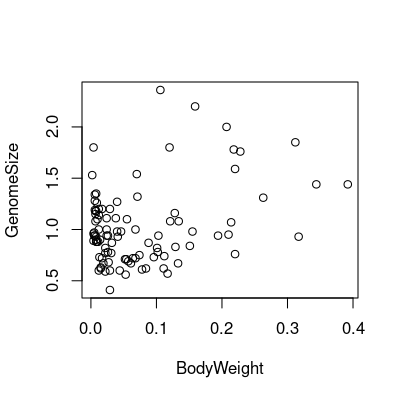

In [93]:
plot(GenomeSize ~ BodyWeight, data = genome)

The scatterplot seems to show a weak relationship between genome size and morphology. But maybe dragonflies and damselflies show different relationships, and we can't distinguish between them! To explore this possibility, we need to plot the two orders using different colours or plot characters. In the next code block, we will customize the plots to show different types of points for each suborder. It is done by using *indexing* (recall the first [R Chapter](07-R.ipynb#Acessing-parts-of-data-stuctures:-Indices-and-Indexing)).

$\star$ Run the first three lines of code in block 8. There are two levels of suborder and these two lines set up a colour and a plot symbol that will be used for each one.

In [67]:
str(genome$Suborder) #Confirm that there are two levels under suborders 

 chr [1:100] "Anisoptera" "Anisoptera" "Anisoptera" "Anisoptera" ...


You can see that there are two levels, with Anisoptera first and then Zygoptera. You can also see that these are stored as numeric values: 1 refers to the first level and 2 the second. We can use these as *indices* to pair the colours and plot symbols to each suborder. These are set in the `plot` function using the options `col=` and `pch=`, which stands for " `p`lot `ch`aracter".

In [94]:
myColours <- c('red', 'blue') # So choose two colours
mySymbols <- c(1,3) # And two different markers

Run the next plot command to see the resulting plot:

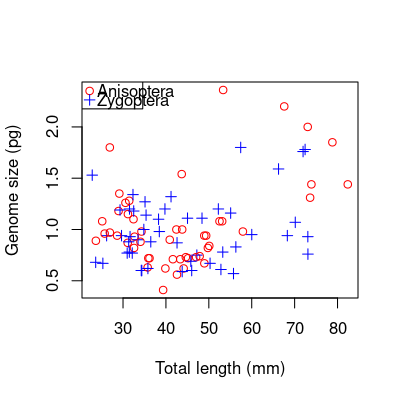

In [97]:
plot(GenomeSize ~ TotalLength , data = genome, #Now plot again
col = myColours, pch = mySymbols,
xlab='Total length (mm)', ylab='Genome size (pg)')

legend("topleft", legend=levels(genome$Suborder), #Add legend at top left corner
       col= myColours, pch = mySymbols, cex = 1)

Thus each point gets the appropriate colour and symbol for its group. This is the indexing: `myColours[Suborder]` and `mySymbols[Suborder]` automatically assign the two colors and two symbols to the two suborders.

There are a lot of built in colours and plot symbols in R, so the next thing to experiment with is changing these to your own versions.

$\star$ In the R commandline, type in the function `colors()`. 

You'll see a long list of options to choose from, so pick two to replace red and blue in the plot above.

The options for the plot symbols are shown below. Pick two to replace the current symbol choices.

---

<img src="./graphics/pch.png" width="400px"> 

---

Rerun the `plot` function and see what you get!


## Save your results

### Saving the exploratory graphics

The file 'GenomeSize.pdf' in the practical folder was created using the next block of code using the approach you [learned previously](08-Data_R.ipynb#Saving-your-graphics). The function `pdf` opens a new empty pdf file which can then be used to plot graphs. You can set the width and the height of the page size in the pdf but note that this is set in *inches*. When you have finished creating a plot, the function `dev.off` closes the pdf file and makes it readable.

$\star$ Open 'GenomeSize.pdf' in a PDF reader. It uses the original colours and
plot symbols. Close the file and then delete it from the folder.

$\star$ Now go back to the script in R and select and run all the code in block (9)

Go back to the `results` folder. The pdf file should have been recreated — open it and it should now use your choice of colours and symbols.

### Saving other results

You can also save the data and variables in R format — the original data, two subsets of the data and the two sets of colours and symbols. This will make it easy to restart where you left off. However, We can recreate the data subsets easily, so we'll just save the data and your colour sets.

$\star$ Go to the script window and run the final line in block (10)

Still in the script window, choose 'File $\triangleright$ Save' to save your changes to the script file.

Quit from R by typing `q()` at the R command prompt. You can also use ctrl+D in Unix).


## From data exploration to statistical analysis

After you have performed your data exploration, you are in a position to make an informed decision about what statistical analyses to perform. Here is a decision tree that you can use, and which includes the methods you will learn in the following chapters:  

---

<img src="./graphics/yr1_2_flowchart.svg" class="bg-primary" width="900px">